<a href="https://colab.research.google.com/github/Dvagm/Churn_project/blob/main/Churn_Telco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset source**

https://www.kaggle.com/datasets/kapturovalexander/customers-churned-in-telecom-services

In [ ]:
!pip install kaggle
!kaggle datasets download -d kapturovalexander/customers-churned-in-telecom-services
!unzip customers-churned-in-telecom-services.zip


Dataset URL: https://www.kaggle.com/datasets/kapturovalexander/customers-churned-in-telecom-services
License(s): CC0-1.0
  0% 0.00/112k [00:00<?, ?B/s]
100% 112k/112k [00:00<00:00, 19.9MB/s]
Archive:  customers-churned-in-telecom-services.zip
  inflating: customer_churn_telecom_services.csv  


In [ ]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.4 MB/s eta 0:00:00


# Library

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.colors as pc
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# EDA

In [ ]:
df = pd.read_csv('/content/customer_churn_telecom_services.csv')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Data Preprocessing & Feature engineering

In [ ]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.dropna(axis=0, inplace= True)


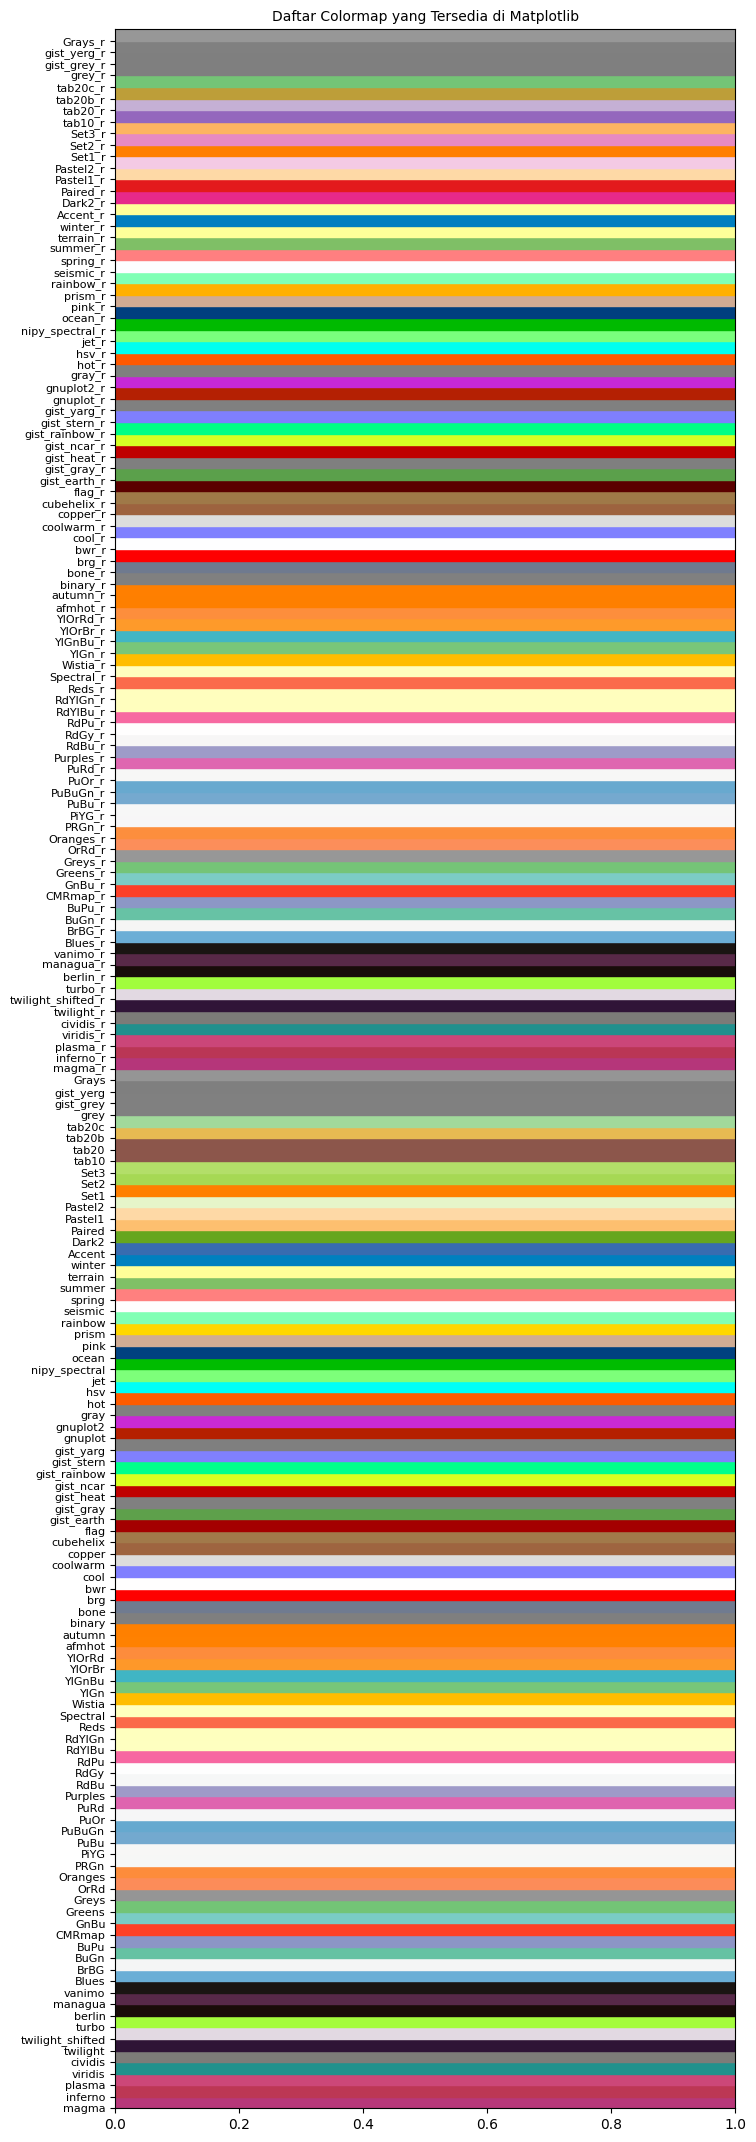

In [ ]:
import plotly.express as px

fig = px.colors.qualitative.swatches()
fig.show()

import matplotlib.pyplot as plt

# Ambil daftar warna bawaan dari Matplotlib
colors = list(plt.colormaps())

# Tentukan jumlah warna yang akan ditampilkan
num_colors = len(colors)

# Buat gambar dengan ukuran menyesuaikan jumlah warna
fig, ax = plt.subplots(figsize=(8, num_colors * 0.15))
ax.set_xlim(0, 1)
ax.set_ylim(0, num_colors)
ax.set_yticks(range(num_colors))
ax.set_yticklabels(colors, fontsize=8)

# Tampilkan setiap warna sebagai kotak
for i, color in enumerate(colors):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, color=plt.get_cmap(color)(0.5)))

plt.title("Daftar Colormap yang Tersedia di Matplotlib", fontsize=10)
plt.show()



In [ ]:
# Membuat subplot 3x3
fig = make_subplots(
    rows=3, cols=3,
    subplot_titles=[
        "Gender Distribution", "Senior Citizen", "Partner Status",
        "Internet Service", "Contract Type", "Churn Distribution",
        "Monthly Charges", "Total Charges", "Tenure Distribution"
    ],
    specs=[
        [{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],
        [{"type": "pie"}, {"type": "pie"}, {"type": "bar"}],
        [{"type": "histogram"}, {"type": "box"}, {"type": "histogram"}]
    ]
)

# Pilihan palet warna dari Plotly
qualitative_colors = px.colors.qualitative.Set2  # Warna lembut dan serasi untuk kategori
sequential_colors = px.colors.sequential.Viridis  # Warna bertingkat untuk histogram & box plot

# Gender Distribution (Pie Chart)
gender_counts = df['gender'].value_counts()
fig.add_trace(go.Pie(labels=gender_counts.index, values=gender_counts.values, textinfo='label+percent',
                      marker=dict(colors=[qualitative_colors[0], qualitative_colors[1]])), row=1, col=1)

# Senior Citizen (Pie Chart)
senior_counts = df['SeniorCitizen'].value_counts()
fig.add_trace(go.Pie(labels=['Non-Senior', 'Senior'], values=senior_counts.values, textinfo='label+percent',
                      marker=dict(colors=[qualitative_colors[2], qualitative_colors[3]])), row=1, col=2)

# Partner Status (Pie Chart)
partner_counts = df['Partner'].value_counts()
fig.add_trace(go.Pie(labels=partner_counts.index, values=partner_counts.values, textinfo='label+percent',
                      marker=dict(colors=[qualitative_colors[4], qualitative_colors[5]])), row=1, col=3)

# Internet Service (Pie Chart)
internet_counts = df['InternetService'].value_counts()
fig.add_trace(go.Pie(labels=internet_counts.index, values=internet_counts.values, textinfo='label+percent',
                      marker=dict(colors=qualitative_colors[:3])), row=2, col=1)

# Contract Type (Pie Chart)
contract_counts = df['Contract'].value_counts()
fig.add_trace(go.Pie(labels=contract_counts.index, values=contract_counts.values, textinfo='label+percent',
                      marker=dict(colors=qualitative_colors[3:6])), row=2, col=2)

# Churn Distribution (Bar Chart)
churn_counts = df['Churn'].value_counts()
fig.add_trace(go.Bar(x=churn_counts.index, y=churn_counts.values, marker_color=qualitative_colors[6],
                      text=churn_counts.values, textposition='outside'),
              row=2, col=3)

# Monthly Charges (Histogram)
fig.add_trace(go.Histogram(x=df['MonthlyCharges'], nbinsx=40, marker_color=sequential_colors[4]),
              row=3, col=1)
fig.update_xaxes(title_text="Monthly Charges ($)", row=3, col=1)
fig.update_yaxes(title_text="Frequency", row=3, col=1)

# Total Charges (Box Plot)
fig.add_trace(go.Box(y=df['TotalCharges'], marker_color=sequential_colors[6]),
              row=3, col=2)
fig.update_yaxes(title_text="Total Charges ($)", row=3, col=2)

# Tenure (Histogram)
fig.add_trace(go.Histogram(x=df['tenure'], nbinsx=40, marker_color=sequential_colors[8]),
              row=3, col=3)
fig.update_xaxes(title_text="Tenure (Months)", row=3, col=3)
fig.update_yaxes(title_text="Frequency", row=3, col=3)

# Layout styling
fig.update_layout(
    height=1000, width=1200, title_text="Interactive EDA Dashboard with Labels",
    showlegend=True,
    template="plotly_dark"  # Menggunakan tema gelap agar lebih elegan
)

# Simpan ke file HTML
fig.write_html("eda_dashboard.html")

# Tampilkan
fig.show()


In [ ]:
# Pastikan bahwa TotalCharges bertipe float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Encoding target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Memisahkan fitur dan target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Identifikasi kolom kategorikal
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Pastikan semua kolom kategorikal bertipe object
X[categorical_cols] = X[categorical_cols].astype('object')

# Definisi preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(include=['int64', 'float64']).columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


# Model Random forest

In [ ]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline untuk Random Forest
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Parameter grid untuk Random Forest
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Randomized Search CV untuk Random Forest
rf_random = RandomizedSearchCV(rf_pipeline, param_distributions=param_grid_rf,
                               n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)
rf_random.fit(X_train, y_train)

# Evaluasi model terbaik untuk Random Forest
y_pred_rf = rf_random.best_estimator_.predict(X_test)
print("Random Forest Best Parameters:", rf_random.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Random Forest Best Parameters: {'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 30, 'classifier__bootstrap': False}
Random Forest Accuracy: 0.7924662402274343
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1033
           1       0.65      0.47      0.55       374

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# Model XGboost

In [ ]:
# Pipeline untuk XGBoost
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Parameter grid untuk XGBoost
param_grid_xgb = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__max_depth': [3, 6, 10],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__subsample': [0.5, 0.6, 0.7],
    'classifier__colsample_bytree': [0.5, 0.6, 0.7],
    'classifier__gamma': [0, 0.1, 0.2, 0.3],
    'classifier__reg_lambda': [0, 0.1, 0.5]
}

# Randomized Search CV untuk XGBoost
xgb_random = RandomizedSearchCV(xgb_pipeline, param_distributions=param_grid_xgb,
                                n_iter=20, cv=5, verbose=2, n_jobs=-1, random_state=42)
xgb_random.fit(X_train, y_train)

# Evaluasi model terbaik untuk XGBoost
y_pred_xgb = xgb_random.best_estimator_.predict(X_test)
print("XGBoost Best Parameters:", xgb_random.best_params_)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
XGBoost Best Parameters: {'classifier__subsample': 0.5, 'classifier__reg_lambda': 0.5, 'classifier__n_estimators': 100, 'classifier__max_depth': 3, 'classifier__learning_rate': 0.1, 'classifier__gamma': 0.3, 'classifier__colsample_bytree': 0.5}
XGBoost Accuracy: 0.7960199004975125
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[13:50:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


